In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv")

In [ ]:
internet_df = pd.read_csv("../data/internet_use.csv", nrows=4496)


Look at the shape of each DataFrame - how many rows? How many columns?

In [15]:
gdp_df.shape, internet_df.shape

((6870, 4), (4496, 4))

Take a look at the datatypes for the columns in each DataFrame.

In [16]:
gdp_df.dtypes, internet_df.dtypes

(Country             object
 Year                object
 GDP_Per_Capita     float64
 Value Footnotes    float64
 dtype: object,
 Country                object
 Year                   object
 Internet_Users_Pct    float64
 Value Footnotes       float64
 dtype: object)

Take a look at the last 10 rows of each DataFrame in turn.

In [17]:
rows = gdp_df.tail(10), internet_df.tail(10)

print(rows)

(            Country                                      Year  GDP_Per_Capita  \
6860       Zimbabwe                                      1997     3580.048793   
6861       Zimbabwe                                      1996     3520.430146   
6862       Zimbabwe                                      1995     3226.413930   
6863       Zimbabwe                                      1994     3263.934978   
6864       Zimbabwe                                      1993     3033.504852   
6865       Zimbabwe                                      1992     3054.889178   
6866       Zimbabwe                                      1991     3426.598094   
6867       Zimbabwe                                      1990     3324.348171   
6868  footnoteSeqID                                  Footnote             NaN   
6869              2  Excludes South Sudan after July 9, 2011.             NaN   

      Value Footnotes  
6860              NaN  
6861              NaN  
6862              NaN  
6863       

Drop the value footnotes column from both DataFrames. Check that this worked as expected.

Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [18]:
gdp_df.rename(columns={'Country or Area':'Country'}, inplace=True)
gdp_df.rename(columns={'Value':'GDP_Per_Capita'}, inplace=True)


Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [19]:
internet_df.rename(columns={'Country or Area':'Country'}, inplace=True)
internet_df.rename(columns={'Value':'Internet_Users_Pct'}, inplace=True)

In [20]:
internet_df

,Country,Year,Internet_Users_Pct,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.

In [21]:
gdp_and_internet_use = gdp_df.append(internet_df)
  

Look at the first five rows of your new DataFrame to confirm it merged correctly.

In [22]:
df_first_5 = gdp_and_internet_use.head(5)
print(df_first_5)

       Country  Year  GDP_Per_Capita  Value Footnotes  Internet_Users_Pct
0  Afghanistan  2019     2065.036398              NaN                 NaN
1  Afghanistan  2018     2033.779002              NaN                 NaN
2  Afghanistan  2017     2058.383832              NaN                 NaN
3  Afghanistan  2016     2057.062164              NaN                 NaN
4  Afghanistan  2015     2068.265904              NaN                 NaN


Look at the last five rows to make sure the data is clean and as expected.

In [23]:
last_5 = gdp_and_internet_use.tail(5)
print(last_5)

            Country      Year  GDP_Per_Capita  Value Footnotes  \
4491       Zimbabwe      1996             NaN              NaN   
4492       Zimbabwe      1995             NaN              NaN   
4493       Zimbabwe      1994             NaN              NaN   
4494       Zimbabwe      1990             NaN              NaN   
4495  footnoteSeqID  Footnote             NaN              NaN   

      Internet_Users_Pct  
4491            0.016790  
4492            0.007684  
4493            0.001739  
4494            0.000000  
4495                 NaN  


Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [24]:
year.loc[gdp_and_internet_use['Year'].isin(['2004', '2009', '2014'])]

NameError: name 'year' is not defined

Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [25]:
year_04_df = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == '2004']
year_09_df = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == '2009']
year_14_df = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == '2014']

print(year_04_df)
print(year_09_df)
print(year_14_df)

                    Country  Year  GDP_Per_Capita  Value Footnotes  \
15              Afghanistan  2004     1200.278256              NaN   
33                  Albania  2004     7604.838002              NaN   
63                  Algeria  2004    10058.435939              NaN   
93                   Angola  2004     5593.241537              NaN   
123     Antigua and Barbuda  2004    18745.681534              NaN   
...                     ...   ...             ...              ...   
4399               Viet Nam  2004             NaN              NaN   
4419  Virgin Islands (U.S.)  2004             NaN              NaN   
4441                  Yemen  2004             NaN              NaN   
4461                 Zambia  2004             NaN              NaN   
4483               Zimbabwe  2004             NaN              NaN   

      Internet_Users_Pct  
15                   NaN  
33                   NaN  
63                   NaN  
93                   NaN  
123                  NaN

Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).

In [26]:
year_14_df.sort_values(
    by="Internet_Users_Pct",
    ascending=False
)

,Country,Year,GDP_Per_Capita,Value Footnotes,Internet_Users_Pct
1866,Iceland,2014,NaN,7.0,98.16
415,Bermuda,2014,NaN,NaN,96.80
3016,Norway,2014,NaN,7.0,96.30
1083,Denmark,2014,NaN,7.0,95.99
59,Andorra,2014,NaN,NaN,95.90
...,...,...,...,...,...
6727,Vietnam,2014,6098.489609,NaN,NaN
6757,West Bank and Gaza,2014,5967.073437,NaN,NaN
6783,World,2014,15189.648507,NaN,NaN
6813,Zambia,2014,3450.046561,NaN,NaN


Iceland, 98.16

Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [27]:
year_14_df.sort_values("Internet_Users_Pct")

,Country,Year,GDP_Per_Capita,Value Footnotes,Internet_Users_Pct
1065,Dem. People's Rep. of Korea,2014,NaN,NaN,0.00
1256,Eritrea,2014,NaN,NaN,0.99
4019,Timor-Leste,2014,NaN,NaN,1.14
623,Burundi,2014,NaN,NaN,1.38
3648,Somalia,2014,NaN,NaN,1.63
...,...,...,...,...,...
6727,Vietnam,2014,6098.489609,NaN,NaN
6757,West Bank and Gaza,2014,5967.073437,NaN,NaN
6783,World,2014,15189.648507,NaN,NaN
6813,Zambia,2014,3450.046561,NaN,NaN


Korea, 0.00

Repeat for 2004 and 2009.

In [28]:
year_04_df.sort_values(
    by="Internet_Users_Pct",
    ascending=False
)

,Country,Year,GDP_Per_Capita,Value Footnotes,Internet_Users_Pct
3835,Sweden,2004,NaN,7.0,83.89
1876,Iceland,2004,NaN,7.0,83.88
1093,Denmark,2004,NaN,7.0,80.93
3026,Norway,2004,NaN,7.0,77.69
2203,Korea (Rep. of),2004,NaN,93.0,72.70
...,...,...,...,...,...
6737,Vietnam,2004,3689.732423,NaN,NaN
6767,West Bank and Gaza,2004,4485.525458,NaN,NaN
6793,World,2004,12077.823821,NaN,NaN
6823,Zambia,2004,2261.766537,NaN,NaN


Sweden, 83.89

In [29]:
year_04_df.sort_values("Internet_Users_Pct")

,Country,Year,GDP_Per_Capita,Value Footnotes,Internet_Users_Pct
1074,Dem. People's Rep. of Korea,2004,NaN,54.0,0.000000
2824,Myanmar,2004,NaN,NaN,0.024337
2346,Liberia,2004,NaN,NaN,0.031011
3949,Tajikistan,2004,NaN,NaN,0.077480
10,Afghanistan,2004,NaN,NaN,0.105809
...,...,...,...,...,...
6737,Vietnam,2004,3689.732423,NaN,NaN
6767,West Bank and Gaza,2004,4485.525458,NaN,NaN
6793,World,2004,12077.823821,NaN,NaN
6823,Zambia,2004,2261.766537,NaN,NaN


Korea, 0.000000

In [30]:
year_09_df.sort_values(
    by="Internet_Users_Pct",
    ascending=False
)

,Country,Year,GDP_Per_Capita,Value Footnotes,Internet_Users_Pct
1871,Iceland,2009,NaN,NaN,93.00
3021,Norway,2009,NaN,7.0,92.08
3830,Sweden,2009,NaN,157.0,91.00
2885,Netherlands,2009,NaN,97.0,89.63
2412,Luxembourg,2009,NaN,7.0,87.31
...,...,...,...,...,...
6732,Vietnam,2009,4830.304958,NaN,NaN
6762,West Bank and Gaza,2009,5250.116075,NaN,NaN
6788,World,2009,13396.524163,NaN,NaN
6818,Zambia,2009,2917.516220,NaN,NaN


Iceland, 93.00

In [31]:
year_09_df.sort_values("Internet_Users_Pct")

,Country,Year,GDP_Per_Capita,Value Footnotes,Internet_Users_Pct
1069,Dem. People's Rep. of Korea,2009,NaN,NaN,0.000000
4024,Timor-Leste,2009,NaN,NaN,0.185252
2819,Myanmar,2009,NaN,NaN,0.220000
3538,Sierra Leone,2009,NaN,NaN,0.260000
671,Cambodia,2009,NaN,NaN,0.530000
...,...,...,...,...,...
6732,Vietnam,2009,4830.304958,NaN,NaN
6762,West Bank and Gaza,2009,5250.116075,NaN,NaN
6788,World,2009,13396.524163,NaN,NaN
6818,Zambia,2009,2917.516220,NaN,NaN


Korea, 0.000000

Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [32]:
year_14_df.sort_values(
    by="GDP_Per_Capita",
    ascending=False
)

,Country,Year,GDP_Per_Capita,Value Footnotes,Internet_Users_Pct
3721,"Macao SAR, China",2014,156514.133850,NaN,NaN
3691,Luxembourg,2014,108760.916030,NaN,NaN
5138,Qatar,2014,95578.416973,NaN,NaN
5464,Singapore,2014,87808.663157,NaN,NaN
561,Bermuda,2014,77361.104881,NaN,NaN
...,...,...,...,...,...
4389,Viet Nam,2014,NaN,NaN,48.31
4409,Virgin Islands (U.S.),2014,NaN,NaN,50.07
4431,Yemen,2014,NaN,NaN,22.55
4451,Zambia,2014,NaN,NaN,17.34


China, 156514.133850

Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [33]:
year_14_df.sort_values("GDP_Per_Capita")

,Country,Year,GDP_Per_Capita,Value Footnotes,Internet_Users_Pct
1047,Central African Republic,2014,822.610458,NaN,NaN
827,Burundi,2014,886.235777,NaN,NaN
3781,Malawi,2014,1027.208496,NaN,NaN
1422,Dem. Rep. Congo,2014,1029.790785,NaN,NaN
4528,Niger,2014,1127.615541,NaN,NaN
...,...,...,...,...,...
4389,Viet Nam,2014,NaN,NaN,48.31
4409,Virgin Islands (U.S.),2014,NaN,NaN,50.07
4431,Yemen,2014,NaN,NaN,22.55
4451,Zambia,2014,NaN,NaN,17.34


Central African Republic, 822.610458

Create some scatterplots:
a. 2004 Percent Using the Internet vs GDP Per Capita
b. 2009 Percent Using the Internet vs GDP Per Capita
c. 2014 Percent Using the Internet vs GDP Per Capita

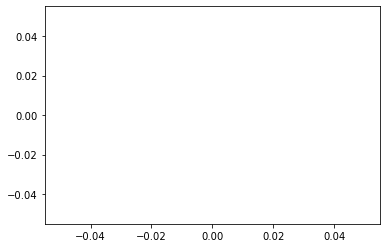

<function matplotlib.pyplot.show(close=None, block=None)>

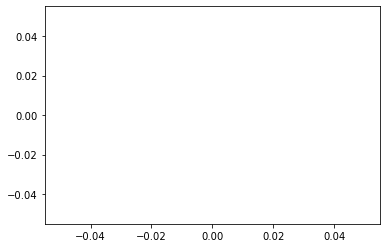

In [58]:
plt.scatter(year_04_df.Internet_Users_Pct, year_04_df.GDP_Per_Capita)
plt.show()

plt.scatter(year_09_df.Internet_Users_Pct, year_09_df.GDP_Per_Capita)
plt.show

plt.scatter(year_14_df.Internet_Users_Pct, year_14_df.GDP_Per_Capita)
plt.show

Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

Look at the distribution of gdp per capita values for 2014. Is it unimodal?

<function matplotlib.pyplot.show(close=None, block=None)>

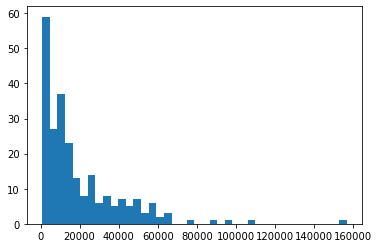

In [59]:
plt.hist(year_14_df.GDP_Per_Capita, bins=40)
plt.show

Look at the distribution of Internet Use for 2014. Is it unimodal?

<function matplotlib.pyplot.show(close=None, block=None)>

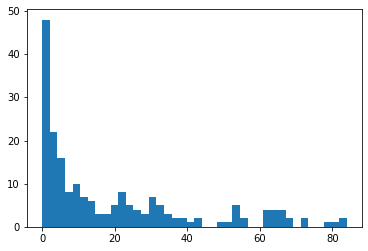

In [60]:
plt.hist(year_04_df.Internet_Users_Pct, bins=40)
plt.show

What are the top 5 countries in terms of internet use in 2014?